## 최적의 군집 개수 찾기

In [32]:
import pandas as pd
import numpy as np

In [17]:
# 데이터 로드
df = pd.read_csv('data6.csv', index_col=0)
df = df.loc[:, ~df.columns.isin(['창업이전', '창업이후'])]
df

기업형태 창업자 학력  창업횟수  창업인원 사업장 입지      매출액      영업이익  금융비용(이자비용)     당기순이익  \
0       법인   중졸이하     1     1   일반주택   265000   15100.0       900.0    4750.0   
2       법인   중졸이하     2     2   일반상업   677000   63045.0     29020.0   46147.0   
3       법인   중졸이하     1     1   일반주택  3936000  264000.0     34300.0  139300.0   
4       법인   중졸이하     1     1   일반주택  5668000  170900.0     18300.0  144850.0   
5       법인   중졸이하     1     1   산업단지    85000    2100.0      1200.0    2050.0   
...    ...    ...   ...   ...    ...      ...       ...         ...       ...   
31974   법인     대졸     1     3   일반주택   524000  152900.0         0.0  110300.0   
31975   법인     대졸     1     1   일반상업   782300   31200.0         0.0   22500.0   
31976   개인     대졸     1     1     기타   526000  191900.0         0.0  138500.0   
31977   개인     대졸     1     1   일반주택   620000  201500.0       400.0  145400.0   
31978   개인     고졸     1     6     기타   803300   93600.0         0.0   22500.0   

       B2C 소비자 매출(%)  B2G 정부 매출(%)  연간 자금 사용금액  전체 인력  자산대비 자금사용비율  
0                100             0    101850.0      1    55.218459  
2                100             0    136948.0      4   970.206210  
3                  0             0    288880.0     17    32.130989  
4                100             0    572130.0     26    15.765648  
5                100             0    110900.0      2  1896.979261  
...              ...           ...         ...    ...          ...  
31974              0             0    882000.0      6    15.873016  
31975              0             0    380000.0      9    23.947368  
31976            100             0     16000.0      7   481.250000  
31977             70             0   1162800.0     15    12.039904  
31978            100             0     80000.0      2   778.750000  

[22540 rows x 14 columns]

In [18]:
# 범주형 변수 처리 - 법인기업을 1로, 개인기업을 0으로
df['기업형태'] = np.where(df['기업형태'] == '법인', 1, 0)
df.rename(columns={'기업형태':'법인기업'}, inplace=True)

In [19]:
# 범주형 변수 처리 - 창업자 학력을 저학력->고학력 순으로 수치화
df['창업자학력'] = df['창업자 학력'].map({'중졸이하':1, '고졸':2, '전문대졸':3, '대졸':4, '석사':5, '박사':5})

df = df.drop('창업자 학력', axis=1)
df['창업자학력'].value_counts()

창업자학력
4    9923
2    7123
3    1919
1    1801
5    1774
Name: count, dtype: int64

In [20]:
# 범주형 변수 처리 - 사업장 입지를 상업지역 유무로 처리
df['상업지역'] = df['사업장 입지'].map({'일반상업':1, '일반주택':0, '기타':0, '산업단지':0, '대학':0})

df = df.drop('사업장 입지', axis=1)
df['상업지역'].value_counts()

상업지역
0    12554
1     9986
Name: count, dtype: int64

In [21]:
# 변수 스케일링
from sklearn.preprocessing import StandardScaler

scale_col = ['매출액', '영업이익', '금융비용(이자비용)', '당기순이익', '연간 자금 사용금액', '자산대비 자금사용비율']
scaler = StandardScaler()
df[scale_col] = scaler.fit_transform(df[scale_col])

In [22]:
# 클러스터링을 위한 최종 데이터
df

법인기업  창업횟수  창업인원       매출액      영업이익  금융비용(이자비용)     당기순이익  \
0         1     1     1 -0.247583 -0.068142   -0.087835 -0.047967   
2         1     2     2 -0.147567 -0.018152   -0.001807  0.001057   
3         1     1     1  0.643576  0.191372    0.014346  0.111371   
4         1     1     1  1.064031  0.094302   -0.034603  0.117944   
5         1     1     1 -0.291279 -0.081696   -0.086917 -0.051164   
...     ...   ...   ...       ...       ...         ...       ...   
31974     1     1     3 -0.184709  0.075535   -0.090588  0.077029   
31975     1     1     1 -0.122005 -0.051355   -0.090588 -0.026947   
31976     0     1     1 -0.184223  0.116198   -0.090588  0.110424   
31977     0     1     1 -0.161404  0.126207   -0.089364  0.118595   
31978     0     1     6 -0.116907  0.013706   -0.090588 -0.026947   

       B2C 소비자 매출(%)  B2G 정부 매출(%)  연간 자금 사용금액  전체 인력  자산대비 자금사용비율  창업자학력  \
0                100             0   -0.192426      1    -0.081219      1   
2                100             0   -0.184086      4    -0.070969      1   
3                  0             0   -0.147986     17    -0.081478      1   
4                100             0   -0.080684     26    -0.081661      1   
5                100             0   -0.190276      2    -0.060587      1   
...              ...           ...         ...    ...          ...    ...   
31974              0             0   -0.007056      6    -0.081660      4   
31975              0             0   -0.126335      9    -0.081569      4   
31976            100             0   -0.212825      7    -0.076447      4   
31977             70             0    0.059664     15    -0.081703      4   
31978            100             0   -0.197618      2    -0.073114      2   

       상업지역  
0         0  
2         1  
3         0  
4         0  
5         0  
...     ...  
31974     0  
31975     1  
31976     0  
31977     0  
31978     0  

[22540 rows x 14 columns]

### **K-Means 군집화로 최적의 군집 개수 구하기**

#### Elbow method
- 군집 내 오차제곱합의 합을 군집화의 비용함수로 정의해 비용함수 감소 기울기가 급격히 줄어드는 부분, 즉 더이상 군집을 늘려도 크게 비용이 감소하지 않는 부분을 최적의 군집수로 판단

In [23]:
#!pip install yellowbrick

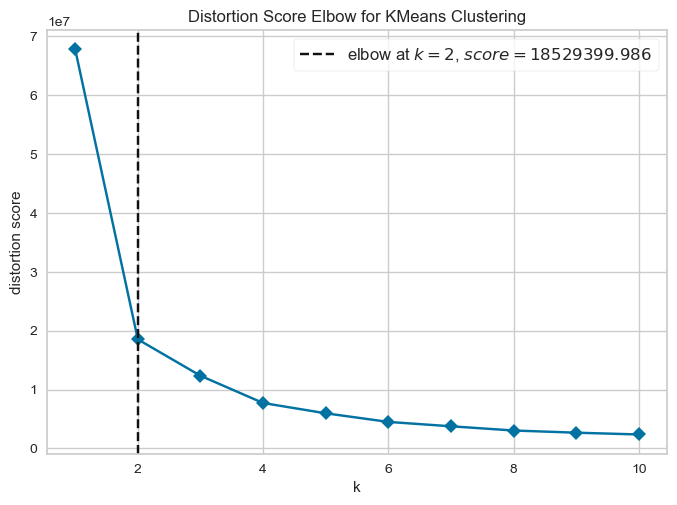

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
# KElbowVisualizer 활용해 계산
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

k=0
kmeans = KMeans(n_clusters=k, random_state=42, n_init=30)
visualizer = KElbowVisualizer(kmeans, k=(1,11), timings=False)
visualizer.fit(df)
visualizer.show()

In [26]:
# 학습/테스트 데이터셋 분리
from sklearn.model_selection import train_test_split 

train_set, test_set = train_test_split(df, test_size = 0.2, random_state=42)

In [ ]:
# kmeans 학습
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(train_set)

In [ ]:
# 
distance_df = pd.DataFrame(kmeans.transform(df), columns=["c0", "c1", "c2"])
print(distance_df)


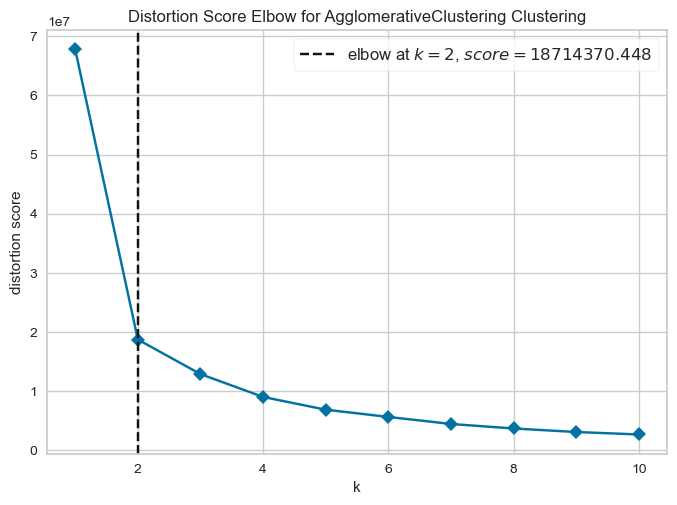

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# 엘보 점수 확인
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

k = 0
agg = AgglomerativeClustering(n_clusters=k, random_state = 42)
elbow = KElbowVisualizer(agg, k=(1,11), timings=False)
elbow.fit(df)
elbow.show()

#### 실루엣 계수
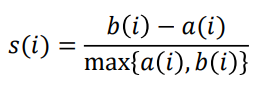
<br>a(i) : 객체 i와 객체 i가 속한 cluster 내 다른 객체들간의 거리 평균
<br>b(i) : 객체 i와 다른 군집에 속한 객체들간의 거리평균 중, 가장 최소값을 가지는 군집과의 거리 평균
<br>-> 0.5이상이면 유의하다고 판단

In [43]:
from sklearn.metrics import silhouette_score, silhouette_samples

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init=30).fit(df)
    silhouette_avg = silhouette_score(df, km.labels_)
    print(f'클러스터 개수: {k} -> 실루엣 계수: {silhouette_avg}')

클러스터 개수: 2 -> 실루엣 계수: 0.7987146501536069
클러스터 개수: 3 -> 실루엣 계수: 0.8277112788525913
클러스터 개수: 4 -> 실루엣 계수: 0.8356258564868793
클러스터 개수: 5 -> 실루엣 계수: 0.8398312039154759
클러스터 개수: 6 -> 실루엣 계수: 0.799587081094162


In [39]:
# 한글 및 부호 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic' #한글
mpl.rcParams['axes.unicode_minus'] = False #마이너스 부호

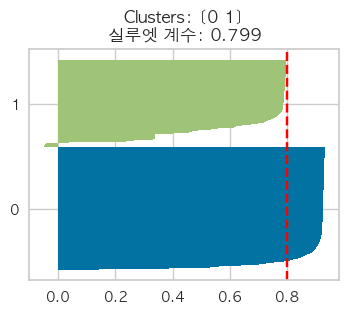

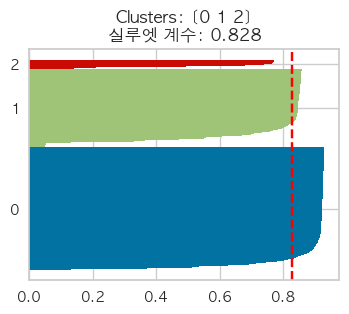

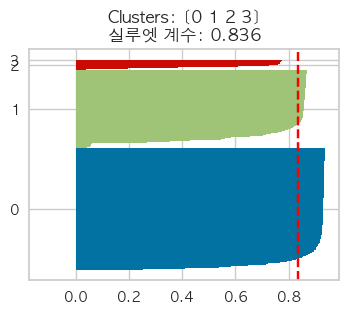

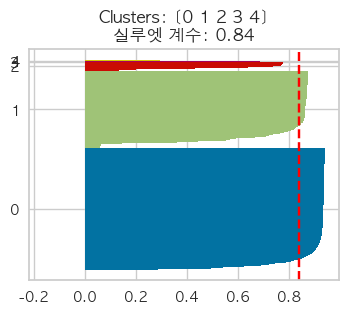

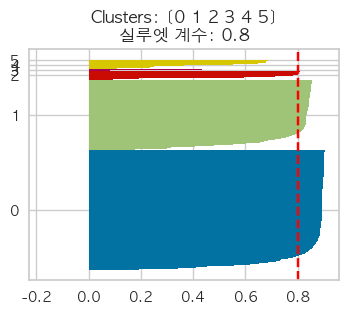

In [48]:
# 실루엣 계수에 따른 각 군집의 비중 시각화
import matplotlib.pyplot as plt

for k in range(2, 7):
    fig, ax = plt.subplots(1, 1, figsize=(4,3))
    
    km = KMeans(n_clusters=k, random_state=42, n_init=30).fit(df)
    silhouette_vals = silhouette_samples(df, km.labels_, metric='euclidean')
    
    y_ticks = []
    y_lower = y_upper = 0

    for c in np.unique(km.labels_):
        
        c_silhouettes = silhouette_vals[km.labels_ == c]
        c_silhouettes.sort()

        y_upper += len(c_silhouettes)
        plt.barh(range(y_lower, y_upper), c_silhouettes, height=1)
        y_ticks.append((y_lower + y_upper) / 2.)
        y_lower += len(c_silhouettes)

    c_num = len(np.unique(km.labels_))
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Clusters: ' + str(np.unique(km.labels_)) + '\n' + '실루엣 계수: ' + str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(c_num)) 
    plt.show()

-> 엘보 방법과 실루엣 계수를 종합적으로 살펴봤을 때, 군집 2개 혹은 3개가 적합하다고 판단했음. 그러나 군집을 2개로 나눌 경우 군집 분석의 의미가 크지 않다고 생각해 3개로 결정.

### **계층적 군집화로 최적의 군집 개수 구하기**

#### 덴드로그램 시각화
https://aboutnlp.tistory.com/61
- method: 새로 형성된 클러스터와 각각의 클러스터 사이의 거리를 계산하는 방법에 대한 파라미터
<br>-> ward method
<br>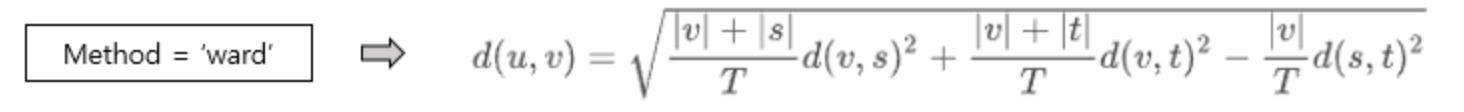
- metric: 거리 측정 방식
<br>-> euclidean (공간에서 두 점 사이를 지나는 선분의 길이를 측정하여 두 점 사이의 거리를 계산하는 방식)
<br>c^2 = a^2 + b^2

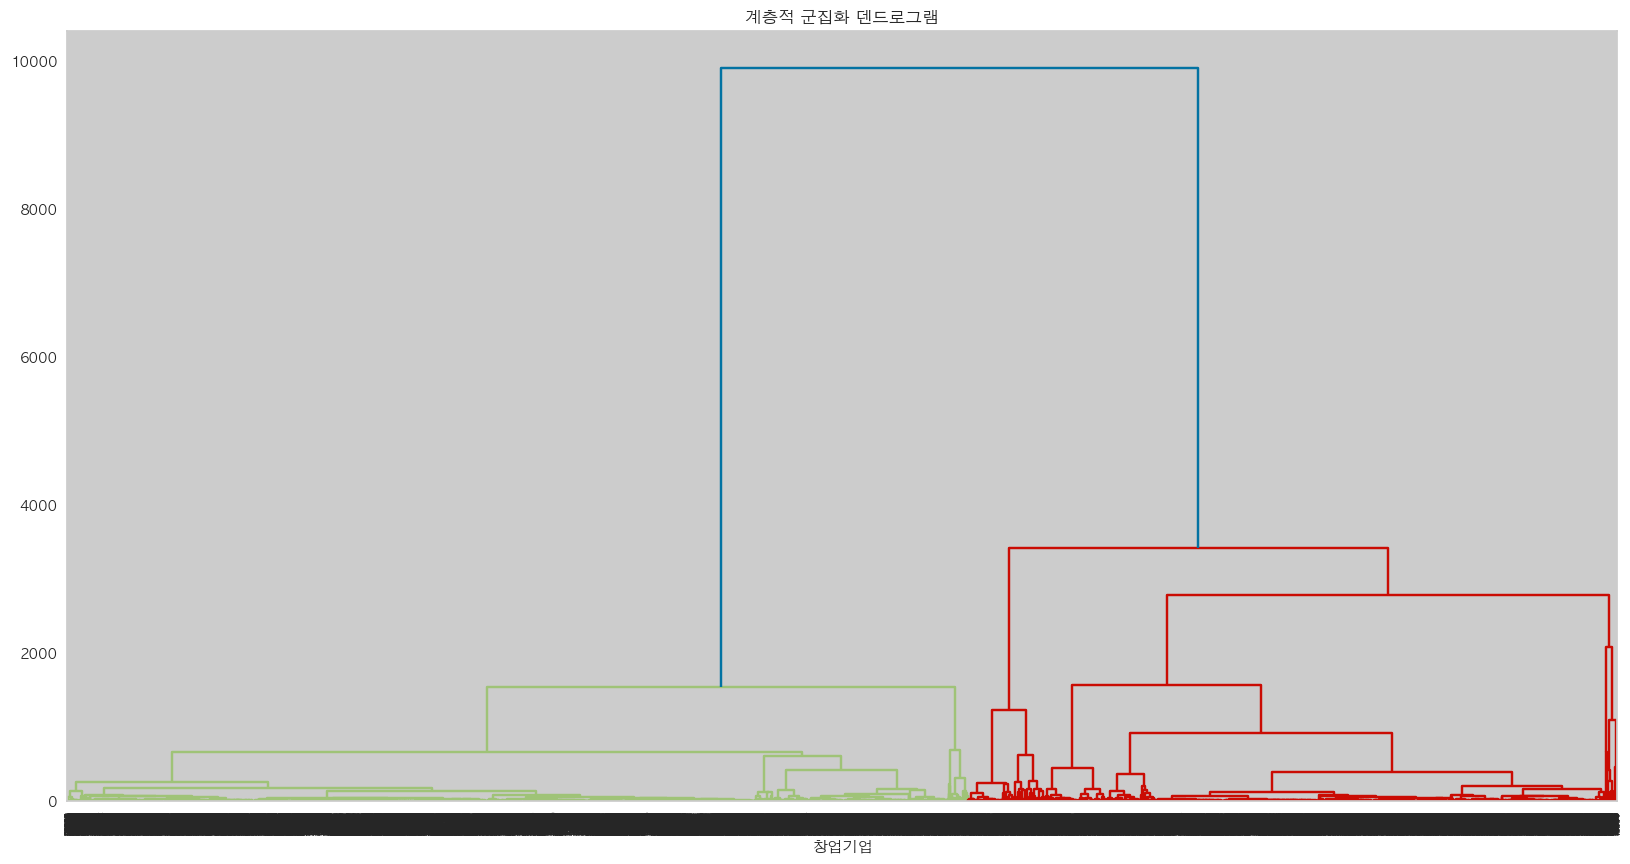

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage

h_clusters = linkage(df, method='ward', metric='euclidean')

fig = plt.figure(figsize=(20, 10))
dendrogram(h_clusters, labels=df.index)
plt.title('계층적 군집화 덴드로그램')
plt.xlabel('창업기업')
plt.show()

#### 3개의 군집에 대해 계층적 군집화

In [51]:
from sklearn.cluster import AgglomerativeClustering

h_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
h_clustering.fit(df)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [103]:
# 3개의 군집 레이블 추가
df['label'] = h_clustering.labels_

# label 0
zero = df[df['label'] == 0]['당기순이익']
# label 1
one = df[df['label'] == 1]['당기순이익']
# label 2
two = df[df['label'] == 2]['당기순이익']

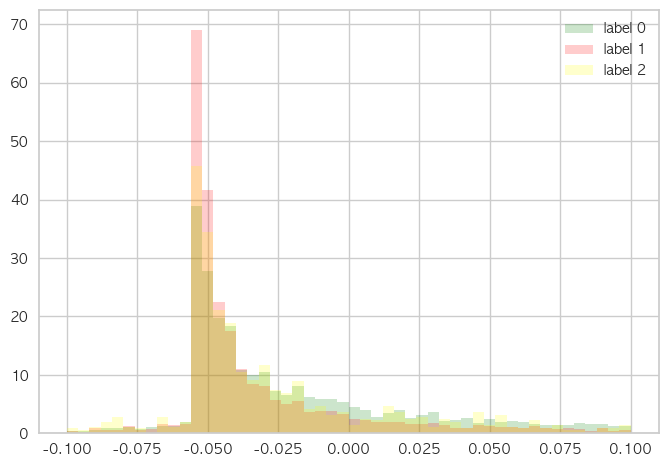

In [110]:
plt.hist(zero, color = 'green', alpha = 0.2, bins = 50, range = [-0.1, 0.1], label = 'label 0', density = True)
plt.hist(one, color = 'red', alpha = 0.2, bins = 50, range = [-0.1, 0.1], label = 'label 1', density = True)
plt.hist(two, color = 'yellow', alpha = 0.2, bins = 50, range = [-0.1, 0.1], label = 'label 2', density = True)

plt.legend()
plt.show()